## ANÁLISIS UNIVARIANTE

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
xlsx = pd.ExcelFile("../data/datos_tratados.xlsx")

# Cargar cada hoja
libros = xlsx.parse("libros")
espectaculos = xlsx.parse("espectaculos")
educacion = xlsx.parse("educacion")
bys = xlsx.parse("bys")
renta = xlsx.parse("renta")

#diferentes
ingresos = xlsx.parse("ingresos")
caracteristicas = xlsx.parse("caracteristicas")

### Tablas

📘Libros
| Variable           | Tipo              | Descripción                     |
| ------------------ | ----------------- | ------------------------------- |
| periodo            | Temporal          | Año del dato                    |
| Comunidad autónoma | Categórica        | Comunidad Autónoma de España    |
| Grupo de gasto | Categórica  | Tipo de producto: libro o publicaciones periódicas |
| Indicador | Categórica | Total, gasto medio por hogar, gasto medio por persona |
| Total_libros      | Numérica continua | Valor del indicador (€ o millones de €) |


🎭 Espectáculos
| Variable           | Tipo              | Descripción                     |
| ------------------ | ----------------- | ------------------------------- |
| periodo            | Temporal          | Año del dato                    |
| Comunidad autónoma | Categórica        | Comunidad Autónoma de España    |
| Indicador | Categórica | Total, gasto medio por hogar, gasto medio por persona |
| Total_espectaculos   | Numérica continua | Gasto o consumo total de espectaculos|

🎓 Educacion
| Variable                     | Tipo              | Descripción                                              |
| ---------------------------- | ----------------- | -------------------------------------------------------- |
| periodo                      | Temporal          | Año del dato                                             |
| Comunidad autónoma           | Categórica        | Comunidad Autónoma de España                             |
| Sexo                         | Categórica        | Hombre o mujer                                           |
| Nivel de formación alcanzado | Categórica        | Categoría educativa (Primaria, ESO, Universitaria, etc.) |
| Total_educacion          | Numérica continua | Porcentajes respecto del total de cada comunidad       |

📰 bys (bienes y servicios culturales)
| Variable           | Tipo              | Descripción                            |
| ------------------ | ----------------- | -------------------------------------- |
| periodo            | Temporal          | Año del dato                           |
| Comunidad autónoma | Categórica        | Comunidad Autónoma de España           |
| Grupo de gasto | Categórica | Libros y publicaciones periódicas, Servicios culturales |
| Indicador | Categórica | Total, gasto medio por hogar, gasto medio por persona |
| Total_bys         | Numérica continua | Gasto en bienes y servicios culturales |



 💶 Renta
| Variable           | Tipo              | Descripción                     |
| ------------------ | ----------------- | ------------------------------- |
| periodo            | Temporal          | Año del dato                    |
| Comunidad autónoma | Categórica        | Comunidad Autónoma de España    |
| Renta anual | Única | Renta neta media por persona |
| Total_renta  | Numérica continua | Renta neta media por persona |

💰 Ingresos
| Variable           | Tipo              | Descripción                     |
| ------------------ | ----------------- | ------------------------------- |
| periodo            | Temporal          | Año del dato                    |
| Indicador | Categórica | Total, gasto medio por hogar, gasto medio por persona |
| Ingresos mensuales | Categórica | Total y rangos de ingresos
| Total_ingresos  | Numérica continua | Gasto en bienes y servicios culturales|

📊 Características
| Variable               | Tipo              | Descripción                                    |
| ---------------------- | ----------------- | ---------------------------------------------- |
| periodo                | Temporal          | Año del dato                                   |
| Caracteristicas      | Categórica        | Tipo de hogar, situación laboral, nivel de estudios, sexo, grupo de edad, estado civil               |
| Total_caracteristicas | Numérica continua | Total de gasto en cultura  |


Nueva columna con periodo a datetime para posible análisis posterior

In [5]:
def convertir_periodo_a_datetime(dataframes_dict, nueva_columna='periodo_dt'):
    """
    Convierte la columna 'periodo' a datetime en cada DataFrame del diccionario.
    Agrega una nueva columna con el nombre especificado.
    """
    for nombre_hoja, df in dataframes_dict.items():
        if 'periodo' in df.columns:
            df[nueva_columna] = pd.to_datetime(df['periodo'], format='%Y') #crea por defecto mes y día (año-01-01)
            df[nueva_columna] = df[nueva_columna].dt.year

In [6]:
dfs = {"libros": libros, "espectaculos": espectaculos, "educacion":educacion, "bys":bys, "cine":cine, "ingresos":ingresos, "caracteristicas":caracteristicas}
dfs = convertir_periodo_a_datetime(dfs)

## ANÁLISIS DE 📘LIBROS


In [7]:
# Ver indicadores únicos
libros["Indicador_libros"].unique()

array(['TOTAL (Millones de euros)', 'GASTO MEDIO POR HOGAR (Euros)',
       'GASTO MEDIO POR PERSONA (Euros)'], dtype=object)

In [8]:
# Filtrar por un indicador específico:
indicador1 = "GASTO MEDIO POR PERSONA (Euros)"
indicador2 = "GASTO MEDIO POR HOGAR (Euros)"
indicador3 = "TOTAL (Millones de euros)"

libros_filtrado1 = libros[libros["Indicador_libros"] == indicador1]
libros_filtrado2 = libros[libros["Indicador_libros"] == indicador2]
libros_filtrado3 = libros[libros["Indicador_libros"] == indicador3]


print("GASTO MEDIO POR PERSONA (Euros):",libros_filtrado1["Total_libros"].describe(), "\nGASTO MEDIO POR HOGAR (Euros)",libros_filtrado2["Total_libros"].describe(),"\nTOTAL (Millones de euros)", libros_filtrado3["Total_libros"].describe())


GASTO MEDIO POR PERSONA (Euros): count    102.000000
mean      24.345098
std       16.111134
min        1.300000
25%        9.725000
50%       23.000000
75%       35.225000
max       63.200000
Name: Total_libros, dtype: float64 
GASTO MEDIO POR HOGAR (Euros) count    102.000000
mean      59.186275
std       39.134923
min        3.500000
25%       24.375000
50%       58.350000
75%       85.825000
max      164.300000
Name: Total_libros, dtype: float64 
TOTAL (Millones de euros) count    102.000000
mean      62.342157
std       78.798880
min        2.000000
25%       15.025000
50%       36.900000
75%       67.950000
max      433.300000
Name: Total_libros, dtype: float64


Nos vamos a centrar en GASTO MEDIO POR PERSONA.

La media está en 24,34%

In [9]:
media_por_comunidad = libros_filtrado1.groupby(["Comunidad autónoma"])["Total_libros"].mean() 
media_por_comunidad.sort_values()

Comunidad autónoma
Andalucía                       12.716667
Canarias                        13.750000
Castilla-La Mancha              16.816667
Comunitat Valenciana            17.600000
Extremadura                     17.883333
Cantabria                       21.183333
Murcia (Región de)              22.050000
Balears (Illes)                 24.700000
Cataluña                        25.083333
Madrid (Comunidad de)           27.366667
Aragón                          28.900000
Galicia                         29.100000
Rioja (La)                      29.266667
Asturias (Principado de)        30.083333
Navarra (Comunidad Foral de)    30.400000
País Vasco                      33.350000
Castilla y León                 33.616667
Name: Total_libros, dtype: float64

In [10]:
# Filtrar las comunidades por debajo de la media
media_por_comunidad[media_por_comunidad < 24.34].sort_values()

Comunidad autónoma
Andalucía               12.716667
Canarias                13.750000
Castilla-La Mancha      16.816667
Comunitat Valenciana    17.600000
Extremadura             17.883333
Cantabria               21.183333
Murcia (Región de)      22.050000
Name: Total_libros, dtype: float64

In [11]:
# Top 3
libros_filtrado1.groupby(["Comunidad autónoma"])["Total_libros"].mean().nlargest(3)

Comunidad autónoma
Castilla y León                 33.616667
País Vasco                      33.350000
Navarra (Comunidad Foral de)    30.400000
Name: Total_libros, dtype: float64

Ahora haciendo distinción entre Libros y Publicaciones periódicas

In [12]:
media_grupo=libros_filtrado1.groupby(["Comunidad autónoma", "Grupo de gasto_libros"])["Total_libros"].mean() 
media_grupo

Comunidad autónoma            Grupo de gasto_libros   
Andalucía                     Libro                       20.900000
                              Publicaciones periódicas     4.533333
Aragón                        Libro                       44.566667
                              Publicaciones periódicas    13.233333
Asturias (Principado de)      Libro                       42.933333
                              Publicaciones periódicas    17.233333
Balears (Illes)               Libro                       41.100000
                              Publicaciones periódicas     8.300000
Canarias                      Libro                       23.566667
                              Publicaciones periódicas     3.933333
Cantabria                     Libro                       24.200000
                              Publicaciones periódicas    18.166667
Castilla y León               Libro                       51.633333
                              Publicaciones periódicas    15.

In [13]:
media_grupo = pd.DataFrame(media_grupo)
media_grupo_reset = media_grupo.reset_index() # convertir comunidad y grupo en columnas

In [14]:
#Para poder consultar solo libros
solo_libros = media_grupo_reset[media_grupo_reset["Grupo de gasto_libros"].isin(["Libro"])]

solo_libros.nlargest(3,"Total_libros")

,Comunidad autónoma,Grupo de gasto_libros,Total_libros
12,Castilla y León,Libro,51.633333
24,Madrid (Comunidad de),Libro,46.866667
32,Rioja (La),Libro,46.833333


In [15]:
solo_libros.nsmallest(3,"Total_libros")

,Comunidad autónoma,Grupo de gasto_libros,Total_libros
0,Andalucía,Libro,20.900000
8,Canarias,Libro,23.566667
10,Cantabria,Libro,24.200000


In [16]:
#Para poder consultar solo publicaciones periodicas
periodicos = media_grupo_reset[media_grupo_reset["Grupo de gasto_libros"].isin(["Publicaciones periódicas"])]

periodicos.sort_values(by="Total_libros", ascending=False)

,Comunidad autónoma,Grupo de gasto_libros,Total_libros
31,País Vasco,Publicaciones periódicas,31.366667
29,Navarra (Comunidad Foral de),Publicaciones periódicas,30.066667
11,Cantabria,Publicaciones periódicas,18.166667
5,Asturias (Principado de),Publicaciones periódicas,17.233333
13,Castilla y León,Publicaciones periódicas,15.600000
23,Galicia,Publicaciones periódicas,14.833333
3,Aragón,Publicaciones periódicas,13.233333
33,Rioja (La),Publicaciones periódicas,11.700000
7,Balears (Illes),Publicaciones periódicas,8.300000
25,Madrid (Comunidad de),Publicaciones periódicas,7.866667


In [17]:
# Filtrar por País Vasco y Navarra
seleccion = media_grupo.loc[["País Vasco", "Navarra (Comunidad Foral de)"]]
seleccion

Total_libros
Comunidad autónoma           Grupo de gasto_libros                 
País Vasco                   Libro                        35.333333
                             Publicaciones periódicas     31.366667
Navarra (Comunidad Foral de) Libro                        30.733333
                             Publicaciones periódicas     30.066667

GRÁFICAS

In [18]:
media_por_comunidad = pd.DataFrame(media_por_comunidad)

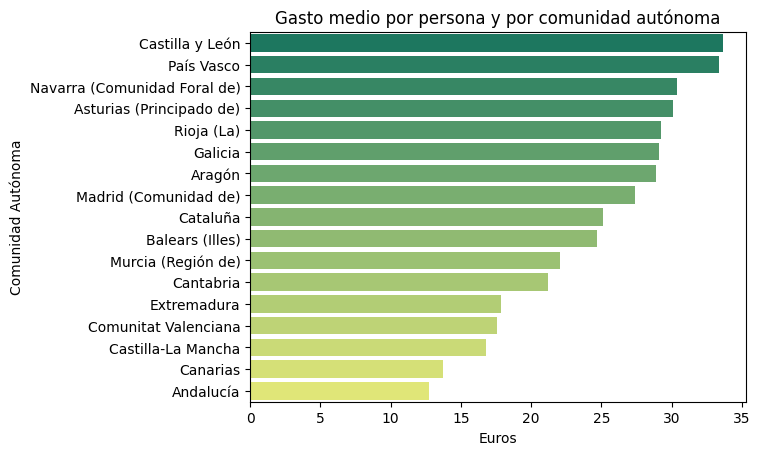

In [19]:
sns.barplot(data= media_por_comunidad.sort_values("Total_libros", ascending=False), x="Total_libros", y="Comunidad autónoma", hue="Comunidad autónoma", palette="summer")
plt.title("Gasto medio por persona y por comunidad autónoma")
plt.xlabel("Euros")
plt.ylabel("Comunidad Autónoma")
plt.show()

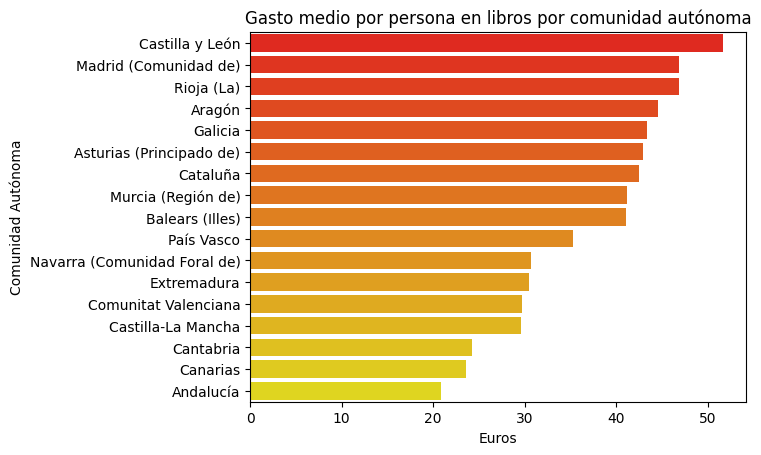

In [20]:
sns.barplot(data=solo_libros.sort_values("Total_libros", ascending=False), x="Total_libros", y="Comunidad autónoma", hue="Comunidad autónoma", palette="autumn")
plt.title("Gasto medio por persona en libros por comunidad autónoma")
plt.xlabel("Euros")
plt.ylabel("Comunidad Autónoma")
plt.show()

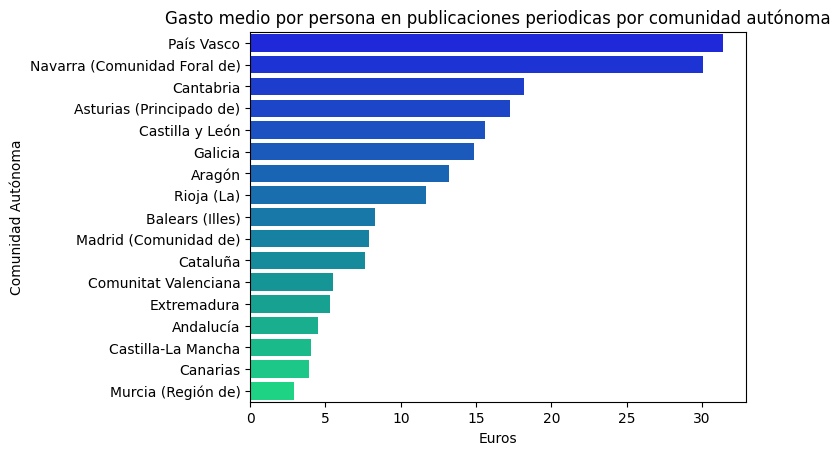

In [21]:
sns.barplot(data=periodicos.sort_values("Total_libros", ascending=False), x="Total_libros", y="Comunidad autónoma", hue="Comunidad autónoma", palette="winter")
plt.title("Gasto medio por persona en publicaciones periodicas por comunidad autónoma")
plt.xlabel("Euros")
plt.ylabel("Comunidad Autónoma")
plt.show()

**¿QUÉ SABEMOS?**

POR GASTO MEDIO DE PERSONA entre 2021-2023

Las 3 comunidades con *mayor* gasto son
* Castilla y León                 
* País Vasco                      
* Navarra (Comunidad Foral de)   

Las 3 comunidades con *menor* gasto son
* Andalucía               
* Canarias                
* Castilla-La Mancha      

Pero si diferenciamos entre libros y publicaciones periódicas. Los libros tienen en todas las comunidades mayor consumo.

Top 3 libros:
* Castilla y León        
* Madrid (Comunidad de)  
* Rioja (La)

Últimas tres:
* Andalucía
* Canarias
* Cantabria

Top 3 publicaciones periodicas:
* País Vasco	
* Navarra (Comunidad Foral de)	
* Cantabria	

Últimas tres:
* Murcia
* Canarias
* Castilla-La Mancha

Las comunidades de Navarra y País Vasco son destacables por tener cifras muy similares en ambos

**Conclusión inicial sobre el gasto en libros y publicaciones periódicas:**

El consumo cultural en formato impreso varía notablemente entre comunidades. Castilla y León lidera el gasto en libros, mientras que País Vasco y Navarra destacan por un equilibrio casi idéntico entre libros y publicaciones periódicas, lo que sugiere una cultura de lectura más diversificada. En contraste, Andalucía y Canarias muestran un menor gasto en ambos formatos, reflejando posibles diferencias en hábitos o acceso cultural.

ANÁLISIS BREVE DE TOTAL

In [22]:
print("TOTAL (Millones de euros)")
libros_total= libros_filtrado3.groupby(["Comunidad autónoma"])["Total_libros"].mean()
libros_total.sort_values(ascending=False)

TOTAL (Millones de euros)


Comunidad autónoma
Cataluña                        192.266667
Madrid (Comunidad de)           184.933333
Andalucía                       107.750000
Comunitat Valenciana             89.666667
Castilla y León                  78.583333
Galicia                          77.783333
País Vasco                       72.266667
Aragón                           37.700000
Castilla-La Mancha               34.400000
Murcia (Región de)               33.700000
Canarias                         30.683333
Balears (Illes)                  30.033333
Asturias (Principado de)         30.000000
Navarra (Comunidad Foral de)     19.916667
Extremadura                      18.616667
Cantabria                        12.300000
Rioja (La)                        9.216667
Name: Total_libros, dtype: float64

In [23]:
print("TOTAL (Millones de euros)")
libros_total= libros_filtrado3.groupby(["Comunidad autónoma", "Grupo de gasto_libros"])["Total_libros"].mean()
libros_total.nlargest(3)

TOTAL (Millones de euros)


Comunidad autónoma     Grupo de gasto_libros
Cataluña               Libro                    326.266667
Madrid (Comunidad de)  Libro                    316.900000
Andalucía              Libro                    177.233333
Name: Total_libros, dtype: float64

In [24]:
#Para poder consultar solo periodicos
total_libros_reset = libros_total.reset_index()
solo_periodicos = total_libros_reset[total_libros_reset["Grupo de gasto_libros"].isin(["Publicaciones periódicas"])]

solo_periodicos.nlargest(3,"Total_libros")

,Comunidad autónoma,Grupo de gasto_libros,Total_libros
31,País Vasco,Publicaciones periódicas,67.933333
17,Cataluña,Publicaciones periódicas,58.266667
25,Madrid (Comunidad de),Publicaciones periódicas,52.966667


| Tipo de gasto               | ¿Qué mide?                                                                                      | ¿Quién destaca?                                                                  |
| --------------------------- | ----------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| **Gasto total**             | Suma del gasto de toda la población de la comunidad &rarr; depende del **tamaño de la población**    | Comunidades más pobladas (Cataluña, Madrid, Andalucía...)                        |
| **Gasto medio por persona** | Promedio del gasto por habitante &rarr; refleja el **nivel de consumo individual o hábito cultural** | Comunidades con mayor interés relativo |


En términos de gasto total (millones de euros), las comunidades más pobladas (Cataluña y Madrid) son también las que más consumen libros y publicaciones periódicas, lo que refleja el efecto directo del tamaño poblacional en el consumo. Andalucía, a pesar de ser la comunidad más poblada, ocupa el tercer lugar en gasto total en libros, lo que sugiere que otros factores, como el nivel económico o los hábitos culturales, también influyen.

Por otro lado, el País Vasco destaca especialmente en publicaciones periódicas, a pesar de tener una población menor. Este resultado es coherente con los datos de gasto medio por persona, donde esta comunidad se situaba entre las primeras.

## ANÁLISIS DE 🎭 ESPECTÁCULOS

In [25]:
# Filtrar por un indicador específico:
indicador1 = "GASTO MEDIO POR PERSONA (Euros)"
indicador2 = "TOTAL (Millones de euros)"

espectaculos_filtrado1 = espectaculos[espectaculos["Indicador_espectaculos"] == indicador1]
espectaculos_filtrado2 = espectaculos[espectaculos["Indicador_espectaculos"] == indicador2]

print("GASTO MEDIO POR PERSONA (Euros):",espectaculos_filtrado1["Total_espectaculos"].describe(), "\nTOTAL (Millones de euros)", espectaculos_filtrado2["Total_espectaculos"].describe())


GASTO MEDIO POR PERSONA (Euros): count    51.000000
mean     25.382353
std      14.107597
min       5.300000
25%      13.050000
50%      22.300000
75%      30.850000
max      58.000000
Name: Total_espectaculos, dtype: float64 
TOTAL (Millones de euros) count     51.000000
mean      67.615686
std       72.230762
min        1.900000
25%       18.500000
50%       42.500000
75%       73.900000
max      305.700000
Name: Total_espectaculos, dtype: float64


BREVE ANÁLISIS TOTAL

In [26]:
print("TOTAL (Millones de euros)")
espectaculos_total= espectaculos_filtrado2.groupby(["Comunidad autónoma"])["Total_espectaculos"].mean()
espectaculos_total.sort_values(ascending=False)

TOTAL (Millones de euros)


Comunidad autónoma
Madrid (Comunidad de)           246.833333
Andalucía                       181.133333
Cataluña                        148.500000
Comunitat Valenciana            103.766667
Castilla y León                  75.100000
Galicia                          67.000000
País Vasco                       58.900000
Balears (Illes)                  50.933333
Aragón                           40.266667
Castilla-La Mancha               32.300000
Canarias                         30.466667
Murcia (Región de)               28.766667
Navarra (Comunidad Foral de)     26.266667
Extremadura                      22.566667
Asturias (Principado de)         14.333333
Cantabria                        11.733333
Rioja (La)                       10.600000
Name: Total_espectaculos, dtype: float64

Nos vamos a centrar en GASTO MEDIO POR PERSONA.

La media está en 25,38%

In [27]:
espectaculos_comunidad= espectaculos_filtrado1.groupby(["Comunidad autónoma"])["Total_espectaculos"].mean()
espectaculos_comunidad.sort_values(ascending=False)

Comunidad autónoma
Balears (Illes)                 41.833333
Navarra (Comunidad Foral de)    39.800000
Madrid (Comunidad de)           36.466667
Rioja (La)                      33.433333
Castilla y León                 32.033333
Aragón                          30.666667
País Vasco                      27.100000
Galicia                         25.033333
Extremadura                     21.600000
Andalucía                       21.300000
Cantabria                       20.166667
Comunitat Valenciana            20.166667
Cataluña                        19.300000
Murcia (Región de)              18.833333
Castilla-La Mancha              15.700000
Asturias (Principado de)        14.366667
Canarias                        13.700000
Name: Total_espectaculos, dtype: float64

In [28]:
espectaculos_comunidad = pd.DataFrame(espectaculos_comunidad)

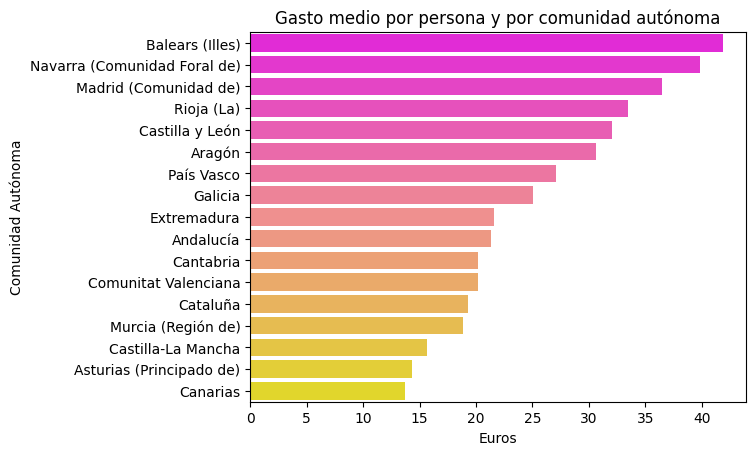

In [29]:
sns.barplot(data= espectaculos_comunidad.sort_values(by= "Total_espectaculos",ascending=False), x="Total_espectaculos", y="Comunidad autónoma", hue="Comunidad autónoma", palette="spring")
plt.title("Gasto medio por persona y por comunidad autónoma")
plt.xlabel("Euros")
plt.ylabel("Comunidad Autónoma")
plt.show()

**¿QUÉ SABEMOS?**

POR GASTO MEDIO DE PERSONA entre 2021-2023

Las 3 comunidades con *mayor* gasto son
* Balears                
* Navarra                    
* Madrid

Las 3 comunidades con *menor* gasto son
* Canarias              
* Asturias                
* Castilla-La Mancha      

**Conclusión inicial sobre espectáculos**

Las comunidades con mayor gasto medio por persona en espectáculos fueron Islas Baleares, Navarra y la Comunidad de Madrid, lo que sugiere un mayor interés o poder adquisitivo destinado a este tipo de actividades culturales.

En el extremo opuesto, Canarias, Asturias y Castilla-La Mancha registraron los valores más bajos de gasto medio

**Comparación con total**

Aunque Madrid lidera el gasto total en espectáculos, seguida por Andalucía y Cataluña, no ocupa el primer lugar en gasto medio por persona. Esto se debe a su gran población, que eleva el gasto total, pero diluye el gasto por habitante.

Por el contrario, comunidades como Islas Baleares y Navarra, que tienen poblaciones más reducidas, se posicionan en los primeros puestos por gasto medio, a pesar de estar en la parte media o baja del ranking total. 

MAYOR GASTO MEDIO POR PERSONA
| LIBROS            | ESPECTÁCULOS                              |
| --------------------------- | ----------------------------------------- | 
| Castilla y Leon <br> País Vasco <br> Navarra <br><br> **Libros**  <br>  Castilla y Leon <br> Madrid <br> La Rioja  <br><br> **Publicaciones periódicas**  <br>  País Vasco <br> Navarra <br> Cantabria      | Balears <br> Navarra <br> Madrid| 


MENOR GASTO MEDIO POR PERSONA
| LIBROS            | ESPECTÁCULOS                              |
| --------------------------- | ----------------------------------------- | 
| Andalucía <br> Canarias <br> Castilla-La Mancha <br><br> **Libros**  <br>  Andalucía <br> Canarias <br> Cantabria  <br><br> **Publicaciones periódicas**  <br>  Murcia <br> Canarias <br> Castilla-La Mancha     | Canarias <br> Asturias <br> Castilla-La Mancha| 

## ANÁLISIS DE 🎓  EDUCACIÓN

El sexo en este caso no es relevante, pues no tenemos esa variable en las otras tablas y no podemos comparar.

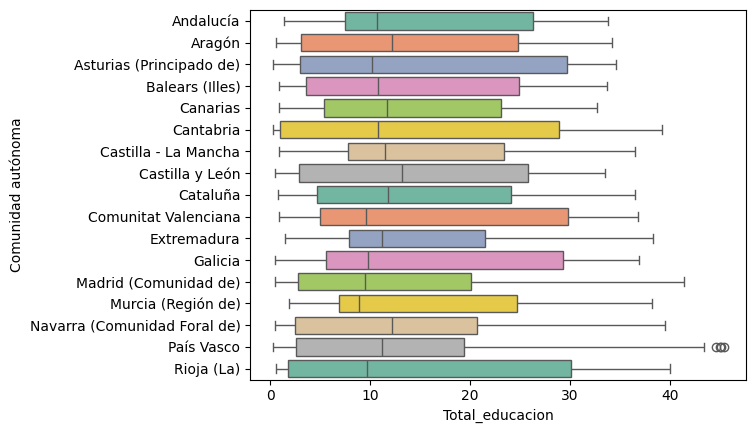

In [30]:
sns.boxplot(
    data=educacion,
    x="Total_educacion",
    y="Comunidad autónoma",
    hue= "Comunidad autónoma",
    palette="Set2");

In [31]:
educacion["Nivel de formación alcanzado"].unique()

array(['Analfabetos', 'Educación primaria', 'Educación superior',
       'Estudios primarios incompletos',
       'Primera etapa de Educación Secundaria y similar',
       'Segunda etapa de educación secundaria con orientación profesional (incluye educación postsecundaria no superior)',
       'Segunda etapa de educación secundaria, con orientación general'],
      dtype=object)

Vamos a dividir en **Educación superior** y **Educación inferior**

SUPERIOR:
* Educación superior &rarr; *Nivel universitario o equivalente*
* Segunda etapa de educación secundaria con orientación profesional (incluye educación postsecundaria no superior) &rarr; *Formación Profesional de grado medio u otros estudios técnicos no universitarios*
* Segunda etapa de educación secundaria, con orientación general &rarr; *Bachillerato*

INFERIOR:
* Analfabetos &rarr; *Personas que no saben leer ni escribir*
* Estudios primarios incompletos &rarr; *Personas que empezaron pero no terminaron la educación primaria obligatoria*
* Primera etapa de Educación Secundaria y similar &rarr; *ESO o equivalentes*

In [32]:
edu_sup = educacion[
    (educacion["Nivel de formación alcanzado"] == "Educación superior") |
    (educacion["Nivel de formación alcanzado"] == "Segunda etapa de educación secundaria con orientación profesional (incluye educación postsecundaria no superior)") |
    (educacion["Nivel de formación alcanzado"] == "Segunda etapa de educación secundaria, con orientación general")]
edu_sup= edu_sup.groupby("Comunidad autónoma")["Total_educacion"].mean().sort_values(ascending=False)
edu_sup

Comunidad autónoma
País Vasco                      22.065741
Madrid (Comunidad de)           21.918056
Navarra (Comunidad Foral de)    20.572685
Cantabria                       19.962500
Asturias (Principado de)        18.843056
Aragón                          18.841667
Cataluña                        18.799537
Canarias                        18.680556
Balears (Illes)                 18.451852
Rioja (La)                      18.406019
Castilla y León                 17.778241
Comunitat Valenciana            17.616204
Galicia                         17.145833
Andalucía                       16.502778
Murcia (Región de)              16.159259
Castilla - La Mancha            15.659259
Extremadura                     14.753704
Name: Total_educacion, dtype: float64

In [33]:
edu_sup.describe()

count    17.000000
mean     18.362173
std       2.024627
min      14.753704
25%      17.145833
50%      18.451852
75%      18.843056
max      22.065741
Name: Total_educacion, dtype: float64

In [34]:
#Superan la media
edu_sup[edu_sup>18.36]

Comunidad autónoma
País Vasco                      22.065741
Madrid (Comunidad de)           21.918056
Navarra (Comunidad Foral de)    20.572685
Cantabria                       19.962500
Asturias (Principado de)        18.843056
Aragón                          18.841667
Cataluña                        18.799537
Canarias                        18.680556
Balears (Illes)                 18.451852
Rioja (La)                      18.406019
Name: Total_educacion, dtype: float64

In [35]:
edu_inf = educacion[
    (educacion["Nivel de formación alcanzado"] == "Analfabetos") |
    (educacion["Nivel de formación alcanzado"] == "Educación primaria") |
    (educacion["Nivel de formación alcanzado"] == "Estudios primarios incompletos")]
edu_inf= edu_inf.groupby("Comunidad autónoma")["Total_educacion"].mean().sort_values(ascending=False)
edu_inf

Comunidad autónoma
Extremadura                     7.465278
Castilla - La Mancha            6.591667
Andalucía                       6.537037
Canarias                        5.993981
Castilla y León                 5.902778
Murcia (Región de)              5.715278
Cataluña                        5.617130
Aragón                          5.443056
Navarra (Comunidad Foral de)    5.224537
Galicia                         4.960185
Balears (Illes)                 4.780093
Comunitat Valenciana            4.561111
País Vasco                      4.218981
Madrid (Comunidad de)           4.194907
Asturias (Principado de)        4.041204
Cantabria                       3.187963
Rioja (La)                      2.982870
Name: Total_educacion, dtype: float64

In [36]:
edu_inf.describe()

count    17.000000
mean      5.142239
std       1.207892
min       2.982870
25%       4.218981
50%       5.224537
75%       5.902778
max       7.465278
Name: Total_educacion, dtype: float64

In [37]:
#Superan la media
edu_inf[edu_inf>5.14]

Comunidad autónoma
Extremadura                     7.465278
Castilla - La Mancha            6.591667
Andalucía                       6.537037
Canarias                        5.993981
Castilla y León                 5.902778
Murcia (Región de)              5.715278
Cataluña                        5.617130
Aragón                          5.443056
Navarra (Comunidad Foral de)    5.224537
Name: Total_educacion, dtype: float64

**¿QUÉ SABEMOS?**

Porcentajes respecto del total de cada comunidad

Las 3 comunidades con mayor % en educación *superior* son
* País Vasco                
* Madrid                    
* Navarra

Las 3 comunidades con mayor % en educación *inferior*  son
* Extremadura                           
* Castilla-La Mancha
* Andalucía     

Comunidades como País Vasco, Madrid y Navarra muestran una mayor concentración de población con niveles de formación superior, lo que puede estar relacionado con una mayor oferta de centros educativos y mayores recursos económicos.

## ANÁLISIS DE 📰 BIENES Y SERVICIOS CULTURALES

In [38]:
# Filtrar por un indicador específico:
indicador1 = "GASTO MEDIO POR PERSONA (Euros)"
indicador2 = "TOTAL (Millones de euros)"

bys_filtrado1 = bys[bys["Indicador_bys"] == indicador1]
bys_filtrado1 = bys_filtrado1[bys_filtrado1["Grupo de gasto_bys"]=="Servicios culturales"] #ya hemos analizado los libros y publicaciones periodicas con libros
bys_filtrado2 = bys[bys["Indicador_bys"] == indicador2]
bys_filtrado2 = bys_filtrado2[bys_filtrado2["Grupo de gasto_bys"]=="Servicios culturales"]

print("GASTO MEDIO POR PERSONA (Euros):",bys_filtrado1["Total_bys"].describe(), "\nTOTAL (Millones de euros)", bys_filtrado2["Total_bys"].describe())


GASTO MEDIO POR PERSONA (Euros): count    51.000000
mean     40.417647
std      17.066221
min      12.400000
25%      25.450000
50%      39.000000
75%      52.750000
max      81.700000
Name: Total_bys, dtype: float64 
TOTAL (Millones de euros) count     51.000000
mean     113.354902
std      119.993692
min        4.700000
25%       34.500000
50%       74.400000
75%      147.150000
max      520.900000
Name: Total_bys, dtype: float64


BREVE ANÁLISIS TOTAL

In [39]:
print("TOTAL (Millones de euros)")
bys_total= bys_filtrado2.groupby(["Comunidad autónoma"])["Total_bys"].mean()
bys_total.sort_values(ascending=False)

TOTAL (Millones de euros)


Comunidad autónoma
Madrid (Comunidad de)           408.733333
Andalucía                       297.600000
Cataluña                        277.900000
Comunitat Valenciana            218.866667
Castilla y León                 100.266667
Galicia                          99.400000
País Vasco                       98.566667
Balears (Illes)                  61.800000
Aragón                           61.566667
Canarias                         58.900000
Castilla-La Mancha               52.366667
Murcia (Región de)               52.300000
Navarra (Comunidad Foral de)     39.766667
Extremadura                      34.266667
Asturias (Principado de)         33.466667
Rioja (La)                       16.133333
Cantabria                        15.133333
Name: Total_bys, dtype: float64

Nos vamos a centrar en GASTO MEDIO POR PERSONA.

La media está en 40,42%

In [40]:
bys_comunidad= bys_filtrado1.groupby(["Comunidad autónoma"])["Total_bys"].mean()
bys_comunidad.sort_values(ascending=False)

Comunidad autónoma
Navarra (Comunidad Foral de)    60.366667
Madrid (Comunidad de)           60.366667
Rioja (La)                      50.866667
Balears (Illes)                 50.800000
Aragón                          46.933333
País Vasco                      45.400000
Castilla y León                 42.800000
Comunitat Valenciana            42.700000
Galicia                         37.166667
Cataluña                        36.066667
Andalucía                       35.000000
Murcia (Región de)              34.233333
Asturias (Principado de)        33.566667
Extremadura                     32.900000
Canarias                        26.433333
Cantabria                       26.033333
Castilla-La Mancha              25.466667
Name: Total_bys, dtype: float64

In [41]:
bys_comunidad = pd.DataFrame(bys_comunidad)

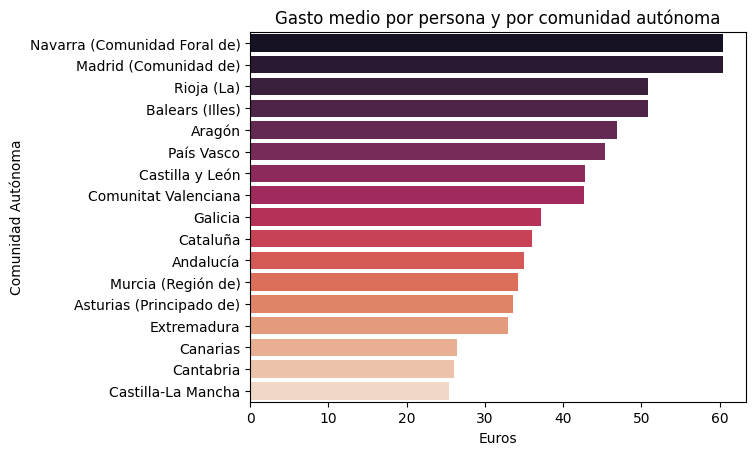

In [42]:
sns.barplot(data= bys_comunidad.sort_values(by= "Total_bys",ascending=False), x="Total_bys", y="Comunidad autónoma", hue="Comunidad autónoma", palette="rocket")
plt.title("Gasto medio por persona y por comunidad autónoma")
plt.xlabel("Euros")
plt.ylabel("Comunidad Autónoma")
plt.show()

**¿QUÉ SABEMOS?**

POR GASTO MEDIO DE PERSONA entre 2021-2023

Las 3 comunidades con *mayor* gasto son
* Navarra               
* Madrid                   
* La Rioja

Las 3 comunidades con *menor* gasto son               
* Castilla-La Mancha   
* Cantabria
* Canarias

**Conclusiones iniciales sobre consumo de servicios culturales**

Navarra, Madrid y La Rioja se posicionaron como las comunidades con mayor gasto medio por persona en servicios culturales, lo que puede reflejar tanto un mayor interés por este tipo de consumo como una mayor capacidad económica individual para acceder a ellos.

En contraste, Castilla-La Mancha, Cantabria y Canarias registraron los niveles más bajos de gasto medio, lo cual podría estar vinculado a limitaciones de oferta cultural, menor inversión pública o menor prioridad en el consumo personal de este tipo de servicios.

MAYOR GASTO MEDIO POR PERSONA
| LIBROS            | ESPECTÁCULOS                              | SERVICIOS CULTURALES |
| --------------------------- | ----------------------------------------- | -------------- | 
| Castilla y Leon <br> País Vasco <br> Navarra <br><br> **Libros**  <br>  Castilla y Leon <br> Madrid <br> La Rioja  <br><br> **Publicaciones periódicas**  <br>  País Vasco <br> Navarra <br> Cantabria      | Balears <br> Navarra <br> Madrid|  Navarra <br> Madrid <br> La Rioja |

MENOR GASTO MEDIO POR PERSONA
| LIBROS            | ESPECTÁCULOS                              | SERVICIOS CULTURALES |
| --------------------------- | ----------------------------------------- | --------------------- | 
| Andalucía <br> Canarias <br> Castilla-La Mancha <br><br> **Libros**  <br>  Andalucía <br> Canarias <br> Cantabria  <br><br> **Publicaciones periódicas**  <br>  Murcia <br> Canarias <br> Castilla-La Mancha     | Canarias <br> Asturias <br> Castilla-La Mancha| Castilla-La Mancha <br> Cantabrias <br> Canarias |

## ANÁLISIS DE 💶 RENTA

In [49]:
renta.Total_renta.describe()

count       51.000000
mean     13097.882353
std       2102.839239
min       9500.000000
25%      11338.500000
50%      12913.000000
75%      14438.000000
max      18189.000000
Name: Total_renta, dtype: float64

In [50]:
renta_total= renta.groupby(["Comunidad autónoma"])["Total_renta"].mean()
renta_total= renta_total.sort_values(ascending=False)

In [51]:
renta_total.sort_values(ascending=False).nlargest(3)

Comunidad autónoma
País Vasco                     16720.000000
Navarra, Comunidad Foral de    15946.000000
Madrid, Comunidad de           15782.666667
Name: Total_renta, dtype: float64

In [52]:
renta_total.sort_values(ascending=False).nsmallest(3)

Comunidad autónoma
Extremadura          10332.000000
Murcia, Región de    10625.666667
Andalucía            10779.000000
Name: Total_renta, dtype: float64

In [53]:
renta_total = pd.DataFrame(renta_total)

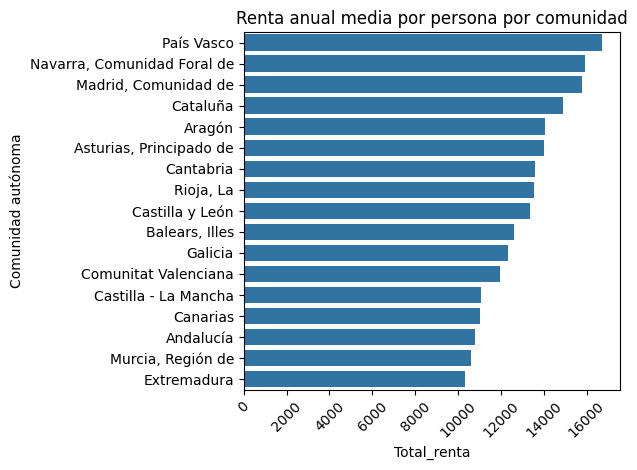

In [54]:
sns.barplot(data=renta_total, x='Total_renta', y='Comunidad autónoma')
plt.xticks(rotation=45)
plt.title('Renta anual media por persona por comunidad')
plt.ylabel('Comunidad autónoma')
plt.tight_layout()
plt.show()

**¿QUÉ SABEMOS?**

RENTA MEDIA POR PERSONA

Las 3 comunidades con *mayor* renta por persona son               
* Pais Vasco 
* Navarra              
* Madrid

Las 3 comunidades con *menor* renta por persona son               
* Extremadura
* Murcia   
* Andalucía

Las comunidades con mayor renta —País Vasco, Navarra y Madrid— se sitúan en la parte norte y centro del país, y coinciden con zonas de alta actividad económica, empleo más estable y mayor urbanización. Por el contrario, Extremadura, Murcia y Andalucía presentan las rentas más bajas.

## ANÁLISIS DE 💰 INGRESOS

Gasto en bienes y servicios culturales por intervalos de ingresos mensuales del hogar

In [55]:
ingresos["Indicador_ingresos"].unique()

array(['TOTAL (Millones de euros)', 'GASTO MEDIO POR PERSONA (Euros)',
       'GASTO MEDIO POR HOGAR (Euros)',
       'EN PORCENTAJE DEL GASTO EN EL TOTAL DE BIENES Y SERVICIOS'],
      dtype=object)

In [56]:
ingresos["Ingresos mensuales en el hogar"].unique()

array(['Total', 'Menos de 1.000 euros', 'Entre 2.500 y 2.999 euros',
       'Entre 2.000 y 2.499 euros', 'Entre 1.500 y 1.999 euros',
       'Entre 1.000 y 1.499 euros', '3.000 y más euros'], dtype=object)

In [57]:
# Filtrar por un indicador específico:
indicador1 = "GASTO MEDIO POR PERSONA (Euros)"

ingresos_filtrado1 = ingresos[ingresos["Indicador_ingresos"] == indicador1]

In [58]:
ingresos_mensuales= ingresos_filtrado1.groupby('Ingresos mensuales en el hogar')['Total_ingresos'].mean().sort_values(ascending=False).reset_index()
ingresos_mensuales

,Ingresos mensuales en el hogar,Total_ingresos
0,3.000 y más euros,305.100000
1,Total,235.666667
2,Entre 2.500 y 2.999 euros,230.166667
3,Entre 2.000 y 2.499 euros,223.666667
4,Entre 1.500 y 1.999 euros,211.200000
5,Entre 1.000 y 1.499 euros,173.366667
6,Menos de 1.000 euros,148.733333


In [59]:
# Datos
data = {
    'Ingreso mensual': [
        '- 1.000€',
        '1.000 - 1.499€',
        '1.500 - 1.999€',
        '2.000 - 2.499€',
        '2.500 - 2.999€',
        '+3.000€'
    ],
    'Ingreso medio estimado': [750, 1250, 1750, 2250, 2750, 3250], 
    'Gasto cultural': [148.73, 173.37, 211.20, 223.67, 230.17, 305.10]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular porcentaje del sueldo destinado a cultura
df['% destinado a cultura'] = (df['Gasto cultural'] / df['Ingreso medio estimado']) * 100

# Mostrar tabla
df


,Ingreso mensual,Ingreso medio estimado,Gasto cultural,% destinado a cultura
0,- 1.000€,750,148.73,19.830667
1,1.000 - 1.499€,1250,173.37,13.869600
2,1.500 - 1.999€,1750,211.20,12.068571
3,2.000 - 2.499€,2250,223.67,9.940889
4,2.500 - 2.999€,2750,230.17,8.369818
5,+3.000€,3250,305.10,9.387692


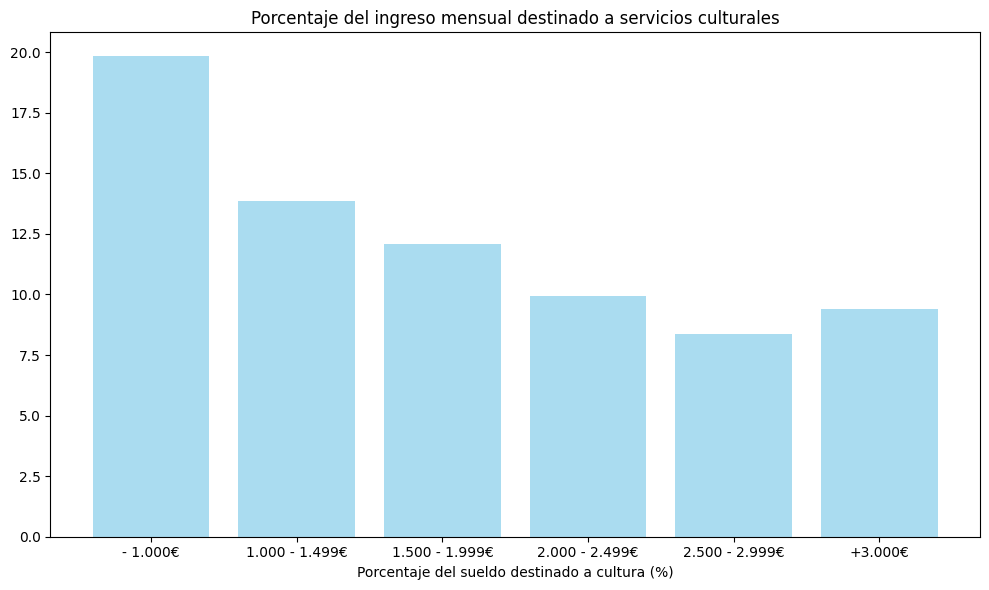

In [60]:
# Gráfica
plt.figure(figsize=(10, 6))
plt.bar(df['Ingreso mensual'], df['% destinado a cultura'], color='skyblue', alpha = 0.7)
plt.xlabel('Porcentaje del sueldo destinado a cultura (%)')
plt.title('Porcentaje del ingreso mensual destinado a servicios culturales')
plt.tight_layout()
plt.show()

El gasto en servicios culturales va creciendo a medida que el ingreso es mayor, pero son los menores ingresos destinan un porcentaje mayor de su sueldo a servicios culturales. 

## ANÁLISIS DE 📊 CARACTERÍSTICAS

In [61]:
caracteristicas.Indicador_caracteristicas.unique()

array(['TOTAL (Millones de euros)', 'GASTO MEDIO POR PERSONA (Euros)',
       'GASTO MEDIO POR HOGAR (Euros)',
       'EN PORCENTAJE DEL GASTO EN EL TOTAL DE BIENES Y SERVICIOS'],
      dtype=object)

In [62]:
caract= caracteristicas.copy()

In [63]:
caracteristicas["Características del sustentador principal"].unique()

array(['Tipo de hogar: Un adulto con hijos',
       'Tipo de hogar: Persona sola', 'Tipo de hogar: Pareja sin hijos',
       'Tipo de hogar: Pareja con un hijo',
       'Tipo de hogar: Pareja con tres o más hijos',
       'Tipo de hogar: Pareja con dos hijos',
       'Tipo de hogar: Otro tipo de hogares', 'Situación laboral: Parado',
       'Situación laboral: Otros inactivos', 'Situación laboral: Ocupado',
       'Situación laboral: Jubilado o retirado',
       'Nivel de estudios: Educación superior o equivalente',
       'Nivel de estudios:  Segunda etapa de educación secundaria',
       'Nivel de estudios:  Primera etapa de ed. secundaria e inferior',
       'Mujeres', 'Hombres', 'Grupo de edad: de 65 años en adelante',
       'Grupo de edad: de 45 a 64 años', 'Grupo de edad: de 30 a 44 años',
       'Grupo de edad: de 16 a 29 años', 'Estado civil: Viudo',
       'Estado civil: Soltero', 'Estado civil: Separado',
       'Estado civil: Divorciado', 'Estado civil: Casado'], dtype=obje

Vamos a fijarnos en el tipo de hogar y el grupo de edad

In [64]:
#TIPO DE HOGAR

def calcular_media_por_hijos(df, indicador):
    # Filtrar por el indicador 
    df_filtrado = df[df["Indicador_caracteristicas"] == indicador].copy()

    # Limpiar la columna de características
    df_filtrado['Caracteristicas'] = df_filtrado['Características del sustentador principal'].str.strip()

    # Identificar si el tipo de hogar incluye hijos o no
    df_filtrado['Hijos'] = df_filtrado['Caracteristicas'].where(df_filtrado['Caracteristicas'].str.startswith('Tipo de hogar'))
    df_filtrado['Hijos'] = df_filtrado['Hijos'].str.contains(r'con.*hijo')

    # Calcular la media del total de características por grupo
    return df_filtrado.groupby("Hijos")["Total_caracteristicas"].mean()

In [65]:
lista_indicadores = ['TOTAL (Millones de euros)', 'GASTO MEDIO POR PERSONA (Euros)', 'GASTO MEDIO POR HOGAR (Euros)', 'EN PORCENTAJE DEL GASTO EN EL TOTAL DE BIENES Y SERVICIOS']
for indicador in lista_indicadores:
   medias= calcular_media_por_hijos(caract, indicador)
   print(indicador)
   print(medias)

TOTAL (Millones de euros)
Hijos
False    1667.944444
True     1535.433333
Name: Total_caracteristicas, dtype: float64
GASTO MEDIO POR PERSONA (Euros)
Hijos
False    257.033333
True     221.591667
Name: Total_caracteristicas, dtype: float64
GASTO MEDIO POR HOGAR (Euros)
Hijos
False    508.722222
True     805.666667
Name: Total_caracteristicas, dtype: float64
EN PORCENTAJE DEL GASTO EN EL TOTAL DE BIENES Y SERVICIOS
Hijos
False    1.744444
True     2.141667
Name: Total_caracteristicas, dtype: float64


**Conclusiones inciales**

Los hogares sin hijos gastan más en total y por persona en cultura, pero menos por hogar.

Los hogares con hijos, aunque gastan menos por persona, gastan más por hogar, lo que sugiere un mayor consumo cultural agregado por necesidades familiares.


In [66]:
#EDAD
def calcular_media_por_edad(df, indicador):
    # Filtrar por el indicador dado
    df_filtrado = df[df["Indicador_caracteristicas"] == indicador].copy()

    # Limpiar la columna de características
    df_filtrado['Caracteristicas'] = df_filtrado['Características del sustentador principal'].str.strip()

    # Extraer grupo de edad
    df_filtrado['Edad'] = df_filtrado['Caracteristicas'].where(df_filtrado['Caracteristicas'].str.startswith('Grupo de edad'))

    # Clasificar en categoría de edad
    condiciones = [
        df_filtrado['Edad'].str.contains("65", na=False), #na=False para que los NaN sean False y no de error
        df_filtrado['Edad'].str.contains("45", na=False),
        df_filtrado['Edad'].str.contains("30", na=False),  
        df_filtrado['Edad'].str.contains("16", na=False)]
    
    categorias = ['Seniors', 'Adultos mayores', 'Adultos', 'Jóvenes']

    df_filtrado['Grupo_edad'] = np.select(condiciones, categorias, default=None) #default=None para que no tenga en cuenta otras categorias

    # Calcular la media del total de características por grupo de edad
    return df_filtrado.groupby('Grupo_edad')["Total_caracteristicas"].mean()

In [67]:
for indicador in lista_indicadores:
    medias= calcular_media_por_edad(caract, indicador)
    print(indicador)
    print(medias)

TOTAL (Millones de euros)
Grupo_edad
Adultos            3411.366667
Adultos mayores    5490.766667
Jóvenes             374.633333
Seniors            1868.733333
Name: Total_caracteristicas, dtype: float64
GASTO MEDIO POR PERSONA (Euros)
Grupo_edad
Adultos            271.800000
Adultos mayores    237.500000
Jóvenes            328.966667
Seniors            178.633333
Name: Total_caracteristicas, dtype: float64
GASTO MEDIO POR HOGAR (Euros)
Grupo_edad
Adultos            728.300000
Adultos mayores    668.933333
Jóvenes            666.833333
Seniors            332.900000
Name: Total_caracteristicas, dtype: float64
EN PORCENTAJE DEL GASTO EN EL TOTAL DE BIENES Y SERVICIOS
Grupo_edad
Adultos            2.400000
Adultos mayores    1.933333
Jóvenes            2.633333
Seniors            1.233333
Name: Total_caracteristicas, dtype: float64


**Conclusiones inciales**

Los adultos mayores (45-64 años) tienen el mayor gasto total en cultura, probablemente por volumen de población.

Jóvenes (16-29 años) y adultos (30-44 años) muestran un mayor gasto medio por persona y mayor porcentaje del gasto total, reflejando un mayor interés o acceso a cultura.

Los seniors (+65) gastan menos tanto en términos absolutos como relativos.